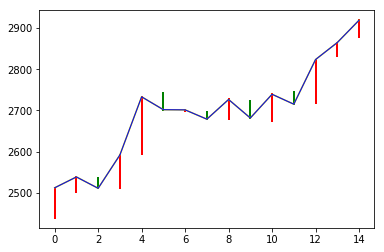

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,
                     2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,
                       2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])

# print(date)
# plt.figure()

lx = []
ly= []

for i in range(0,15):
    # 1 柱状图
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    lx.append(i)
    ly.append(priceOne[1])
    if endPrice[i]>beginPrice[i]:
        plt.plot(dateOne,priceOne,'r',lw=2)
        
    else:
        plt.plot(dateOne,priceOne,'g',lw=2)
plt.plot(lx,ly,'y')
#plt.show()

'''
Input Layer = A(15x1 matrix), Hidden Layer = B(15x10 matrix) layers, Output Layer = C(15x1 matrix)
A(15x1)*w1(1x10)+b1(1x10) = B(15x10)
B(15x10)*w2(10x1)+b2(15x1) = C(15x1)
'''
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])

# Normalize data for training
for i in range(0,15):
    dateNormal[i,0] = i/14.0
    priceNormal[i,0] = endPrice[i]/3000.0;
    
x = tf.placeholder(tf.float32,[None,1])#[None,1]表示n行1列
y = tf.placeholder(tf.float32,[None,1])

# B
w1 = tf.Variable(tf.random_uniform([1,10],0,1))#1行10列的范围在(0,1)的随机数
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
layer1 = tf.nn.relu(wb1) # Renforcement function

# C
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 =tf.nn.relu(wb2)

# y 是真实值, layer2是计算出来的预测值
loss = tf.reduce_mean(tf.square(y-layer2)) 

#通过 梯度下降法(gradient descent)减少误差(loss)
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

trainTimes = 2000

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,trainTimes): 
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
    predict = sess.run(layer2,feed_dict={x:dateNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0] = (predict*3000)[i,0]
    plt.plot(lx,predPrice,'b',lw=1)
    